<a href="https://colab.research.google.com/github/avtar123/Spaceship-Titanic/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/spaceship-titanic/train.csv')
test=pd.read_csv('/content/drive/MyDrive/spaceship-titanic/test.csv')

In [ ]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
train.corr()



<ipython-input-244-f4d37163d5c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


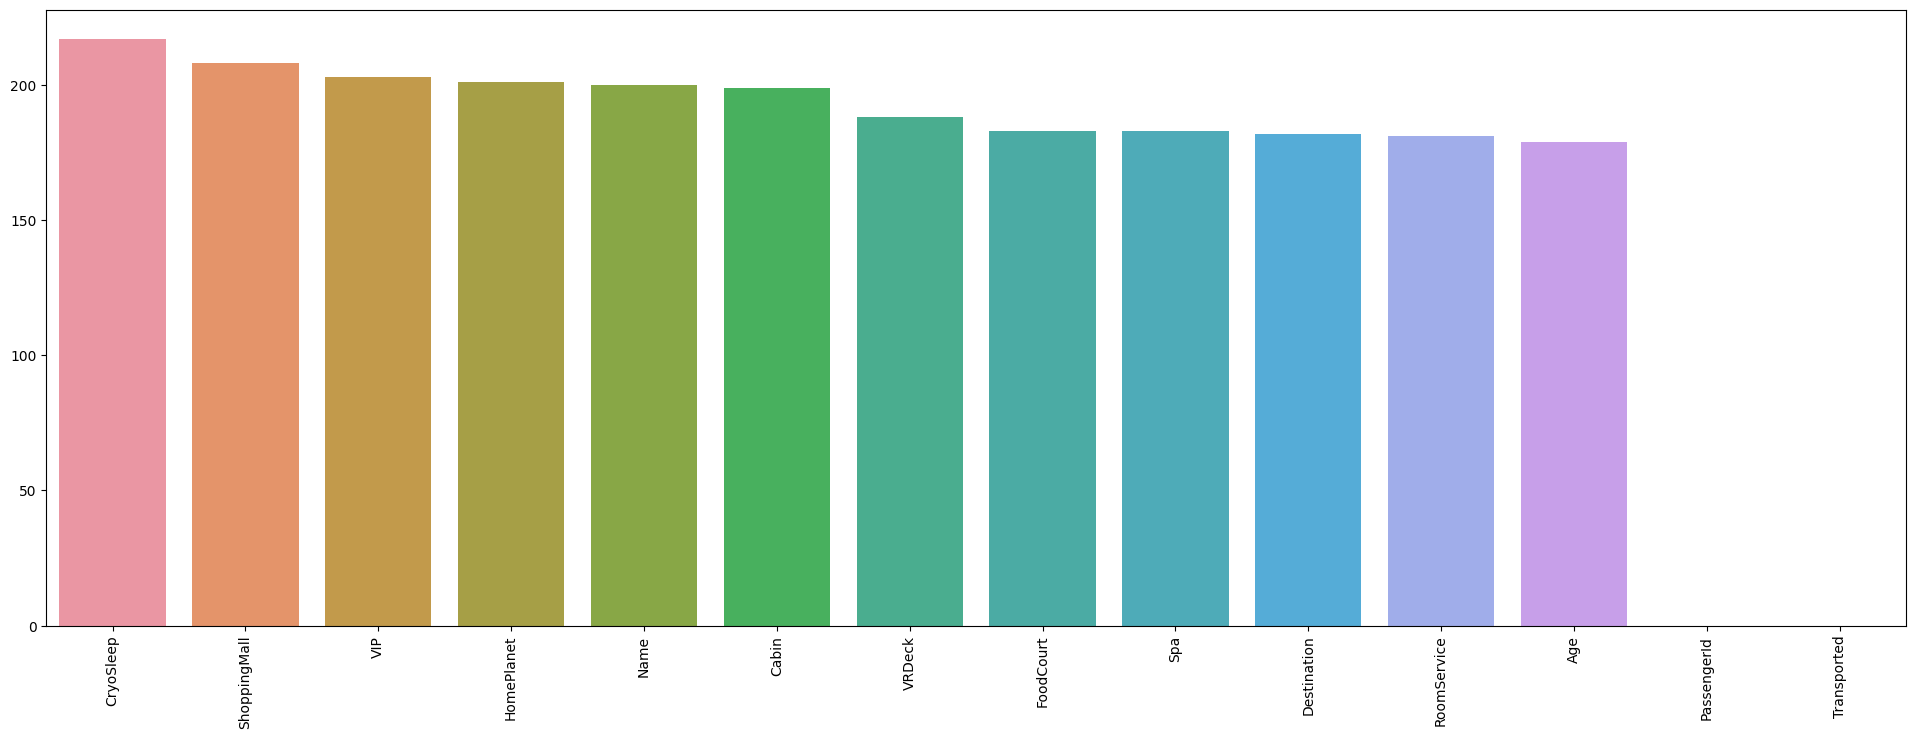

In [ ]:
plt.figure(figsize=(24,8))
cols_with_null=train.isnull().sum().sort_values(ascending=False)
sns.barplot(x=cols_with_null.index,y=cols_with_null)
plt.xticks(rotation=90)
plt.show;

In [ ]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

<ipython-input-247-391511f687af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)


<Axes: >

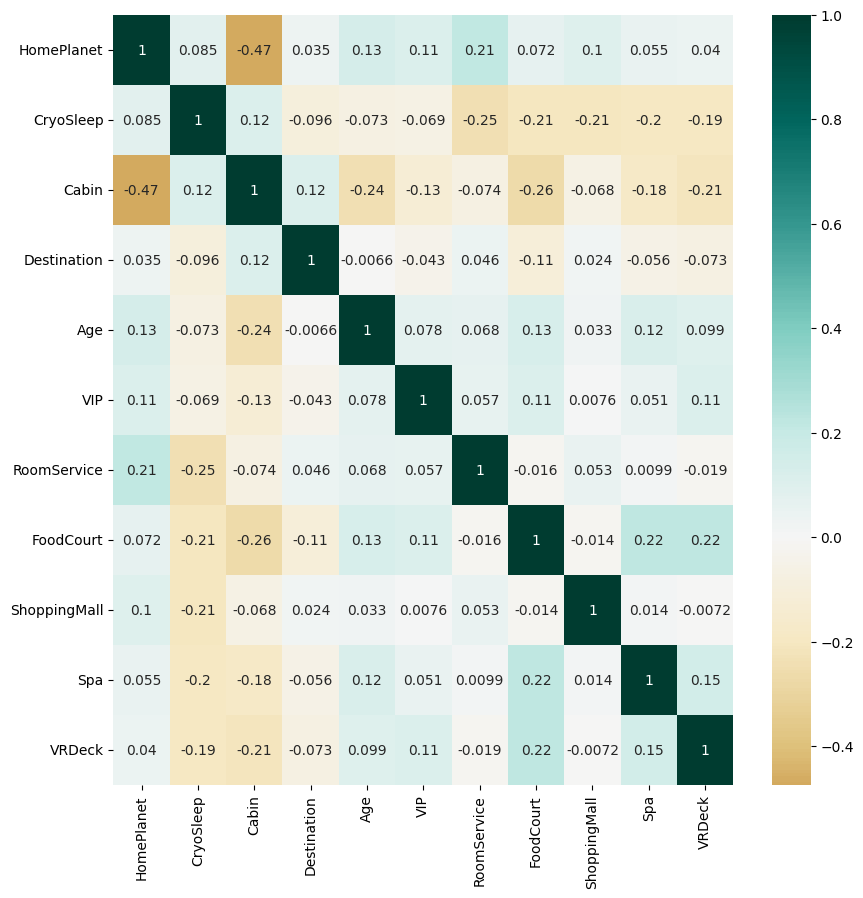

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
heatmap=sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)
heatmap

In [ ]:
df = train.fillna(train.mean())
test = test.fillna(train.mean())

#df = train.fillna(train.std())
#test = test.fillna(train.std())

<ipython-input-248-795a968823d5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = train.fillna(train.mean())
<ipython-input-248-795a968823d5>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test = test.fillna(train.mean())


In [ ]:
string_object=[]
for idx,i in enumerate(df.dtypes):
  if i == 'object':
    string_object.append(df.columns[idx])
    df[df.columns[idx]].fillna(df[df.columns[idx]].value_counts().idxmax(), inplace = True)
    print("{}---------------{}".format(df.columns[idx],i))

PassengerId---------------object
HomePlanet---------------object
CryoSleep---------------object
Cabin---------------object
Destination---------------object
VIP---------------object
Name---------------object


In [ ]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [ ]:
string_object1=[]
for idx,i in enumerate(test.dtypes):
  if i == 'object':
    string_object1.append(test.columns[idx])
    test[test.columns[idx]].fillna(test[test.columns[idx]].value_counts().idxmax(), inplace = True)
    print("{}---------------{}".format(test.columns[idx],i))

PassengerId---------------object
HomePlanet---------------object
CryoSleep---------------object
Cabin---------------object
Destination---------------object
VIP---------------object
Name---------------object


In [ ]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj in string_object:
  print(str_obj)
  df[str_obj]= label_encoder.fit_transform(df[str_obj])

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj in string_object:
  print(str_obj)
  test[str_obj]= label_encoder.fit_transform(test[str_obj])

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
for idx, i in enumerate(df['Transported']):

  if i  == True:
     df['Transported'][idx]=1
  else :
     df['Transported'][idx]=0
#df[df.columns[idx]].fillna(df[df.columns[idx]].value_counts().idxmax(), inplace = True)

<ipython-input-253-b8c5b66e9e41>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transported'][idx]=0


In [ ]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

<ipython-input-255-391511f687af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)


<Axes: >

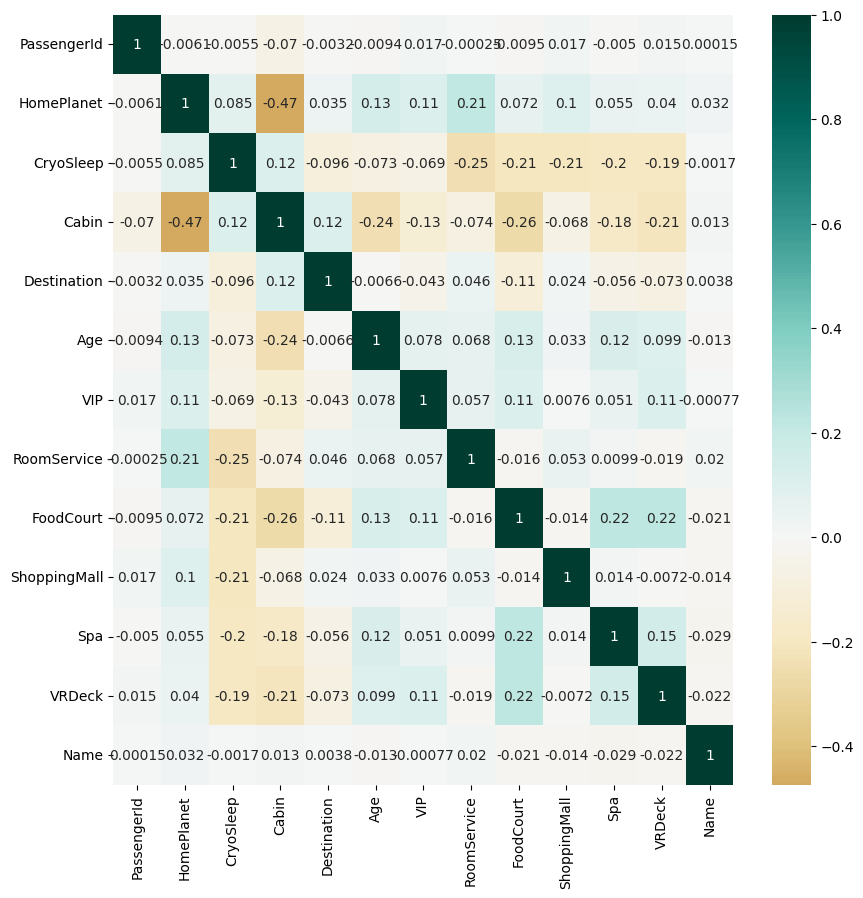

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
heatmap=sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)
heatmap

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import column_or_1d


In [ ]:
X=df.iloc[:,:-1]

In [ ]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,5252
1,1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,4502
2,2,1,0,1,2,58.0,2,43.0,3576.0,0.0,6715.0,49.0,457
3,3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,7149
4,4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,8319
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,1,0,146,0,41.0,2,0.0,6819.0,0.0,1643.0,74.0,3524
8689,8689,0,2,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,4780
8690,8690,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,3002
8691,8691,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,1596


In [ ]:
y=df.iloc[:,-1:]

In [ ]:
type(y)

pandas.core.frame.DataFrame

In [ ]:
y=y.astype('int')

In [ ]:
y

,Transported
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
clf.score(X,y)

0.7825836880248476

In [ ]:
y_pred=clf.predict(X)

In [ ]:
recall_score(y,y_pred)
#0.8551042810098792

0.7983097304705344

In [ ]:
precision_score(y,y_pred)

0.7763216348289649

In [ ]:
y_testcsv=clf.predict(test.iloc[:,0:])


In [ ]:
test.iloc[:,0:]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0,0,2,2784,2,27.00000,0,0.0,0.0,0.0,0.0,0.0,2912
1,1,0,0,1867,2,19.00000,0,0.0,9.0,0.0,2823.0,0.0,2406
2,2,1,2,257,0,31.00000,0,0.0,0.0,0.0,0.0,0.0,3376
3,3,1,0,259,2,38.00000,0,0.0,6652.0,0.0,181.0,585.0,2711
4,4,0,0,1940,2,20.00000,0,10.0,0.0,635.0,0.0,0.0,668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,4272,0,2,2679,2,34.00000,0,0.0,0.0,0.0,0.0,0.0,2105
4273,4273,0,0,2691,2,42.00000,0,0.0,847.0,17.0,10.0,144.0,2654
4274,4274,2,2,602,0,28.82793,0,0.0,0.0,0.0,0.0,0.0,2085
4275,4275,1,0,603,2,28.82793,0,0.0,2680.0,0.0,0.0,523.0,2327


In [ ]:
test1=pd.read_csv('/content/drive/MyDrive/spaceship-titanic/test.csv')

In [ ]:
data_save = pd.DataFrame({"PassengerId":test1['PassengerId'],"Transported":y_testcsv})
#data_save.to_csv("spaceship_Titanic.csv",index=False)

In [ ]:
data_save.head(20)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True


In [ ]:
# Specify the column containing 0s and 1s
column_name = 'Transported'

# Convert 0s and 1s to True and False
data_save[column_name] = data_save[column_name].map({0: False, 1: True})

# Save the updated CSV file
data_save.to_csv('spaceship_Titanicwithout_id_name.csv', index=False)

# **RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
#X, y = make_classification(n_samples=1000)
clf_random = RandomForestClassifier(n_estimators=1000,max_depth=7,min_samples_split=4)
clf_random.fit(X, y)

<ipython-input-320-2106f0c545ed>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_random.fit(X, y)


RandomForestClassifier(max_depth=7, min_samples_split=4, n_estimators=1000)

In [ ]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,5252
1,1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,4502
2,2,1,0,1,2,58.0,2,43.0,3576.0,0.0,6715.0,49.0,457
3,3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,7149
4,4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,8319
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,1,0,146,0,41.0,2,0.0,6819.0,0.0,1643.0,74.0,3524
8689,8689,0,2,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,4780
8690,8690,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,3002
8691,8691,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,1596


In [ ]:
clf_random.score(X,y)

0.8142183365926607

In [ ]:
y_pred_random=clf_random.predict(X)

In [ ]:
precision_score(y,y_pred_random)

0.8069317929349034

In [ ]:
recall_score(y,y_pred_random)

0.8296025582457743

In [ ]:
y_testcsv_random1=clf_random.predict(test.iloc[:,0:])

In [ ]:
test1=pd.read_csv('/content/drive/MyDrive/spaceship-titanic/test.csv')

In [ ]:
data_save = pd.DataFrame({"PassengerId":test1['PassengerId'],"Transported":y_testcsv_random1})
# Specify the column containing 0s and 1s
column_name = 'Transported'

# Convert 0s and 1s to True and False
data_save[column_name] = data_save[column_name].map({0: False, 1: True})

# Save the updated CSV file
data_save.to_csv('spaceship_Titanicrandom10.csv', index=False)

# XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your feature matrix X and target variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create a DMatrix for efficient data handling in XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Define the parameters for the XGBoost model
params = {
    'objective': 'binary:logistic',
    'max_depth': 7,
    'learning_rate': 0.5,
    'n_estimators': 10000
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test set
y_pred = model.predict(dtest)
y_pred_binary = [round(pred) for pred in y_pred]

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)


[11:26:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Accuracy: 0.8010350776308223


# **CatBoostClassifier**

In [ ]:
import catboost as ctb

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()

print(cat_features)

[]


In [ ]:
X.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [ ]:
X.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [ ]:
cat_features=['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name']

In [ ]:
from catboost import CatBoostClassifier

clf_catbost = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    loss_function='CrossEntropy'
)


clf_catbost.fit(X_train, y_train, cat_features=cat_features1,eval_set=(X_val, y_val), verbose=False)



CatBoostError: ignored